<a href="https://colab.research.google.com/github/Andy-2004/Analise-de-dados-em-Python/blob/main/Analise%20de%20dados%20em%20panilha%20Excel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analise de dados Planilha Excel** *Claudemir Cerqueira*

In [1]:
#Importando Biblioteca
import pandas as pd


In [2]:
#leitura dos arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [4]:
#juntando todos os arquivos todas planilhas
df = pd.concat([df1,df2,df3,df4,df5])

In [5]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [6]:
#Exibir 5 ultima linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [7]:
#Exibir uma amostra de 10 linhas
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde
36,Natal,2019-02-09,328.00,853,2
10,Recife,2019-01-01,38.51,982,8
108,Fortaleza,2019-03-02,152.89,981,4
86,Aracaju,2018-01-01,154.92,1521,5
134,Salvador,2019-03-02,125.90,1036,1
22,Aracaju,2018-01-01,150.94,1522,1
131,Recife,2019-03-02,139.07,982,6
94,Fortaleza,2019-01-01,150.49,1003,5
30,Fortaleza,2019-01-01,39.13,1005,6
21,Natal,2019-02-08,679.00,853,2


In [8]:
#Verificando os tipos de dados das planilha
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [9]:
#Alterando um tipode dados de uma coluna
df["LojaID"] = df["LojaID"].astype("object")

In [10]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [11]:
#Consultar valores q estão nulo
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [16]:
#substuir valores nulos por 0
#df["vendas"].fillna(0. inplace=True)

In [13]:
#Apagando os valores nulos
#df.dropna(inplace=True)

In [18]:
# Apagando valores nulos de uma coluna especifica
#f.dropna(subset=["Vendas"], inplace=True)


In [19]:
#Removendo linhas q tem valores faltantes
df.dropna(how="all", inplace=True)

**Criando novas colunas**

In [20]:
#Criando coluna de receitas
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [21]:
df.head(3)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55


In [23]:
#Quando não tem campo vendas e só tem receita
df["Receita/Vendas"] = df["Receita"]/ df["Vendas"]

In [24]:
df.head(3)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0


In [26]:
#Retornando maior receita
df["Receita"].max()

3544.0

In [27]:
#Retornando menor receita
df["Receita"].min()

3.34

In [29]:
#Retornando as três lojas que mais venderam
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [30]:
#Retornando as três lojas que menos venderam
df.nsmallest(3, "Receita")


,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [31]:
#Soma das receitas por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [32]:
#Ordenado o conjunto de dados de Receita do maior para omenor
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


**Analisando por Datas**

In [34]:
#Transformando a coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [35]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [36]:
#Agrupamento de receita por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [79]:
#Criando uma nova coluna do ano
df["Ano_Venda"] = df["Data"].dt.year


In [39]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Vendas
39,Recife,2019-01-01,143.58,981,3,430.74,3.0,2019
44,Salvador,2019-01-01,43.26,1037,2,86.52,2.0,2019
119,Recife,2019-03-02,152.30,982,7,1066.10,7.0,2019
31,Salvador,2019-01-01,202.25,1035,2,404.50,2.0,2019
217,Salvador,2019-01-02,37.65,1036,2,75.30,2.0,2019


In [40]:
#Extraindo o mês  e o dia de vendas
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [41]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Vendas,mes_venda,dia_venda
100,Salvador,2019-01-01,190.97,1036,2,381.94,2.0,2019,1,1
80,Aracaju,2018-01-01,121.77,1523,3,365.31,3.0,2018,1,1
7,Fortaleza,2019-02-11,35.50,1003,2,71.00,2.0,2019,2,11
81,Fortaleza,2019-01-01,10.68,1005,1,10.68,1.0,2019,1,1
52,Fortaleza,2019-01-01,15.22,1003,2,30.44,2.0,2019,1,1


In [42]:
#Retornando a data mais antiga 
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [47]:
#Calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [48]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Vendas,mes_venda,dia_venda,diferenca_dias
42,Natal,2019-03-02,775.00,854,2,1550.00,2.0,2019,3,2,425 days
164,Salvador,2019-01-02,6.59,1035,1,6.59,1.0,2019,1,2,366 days
182,Natal,2019-01-02,6.60,1037,2,13.20,2.0,2019,1,2,366 days
108,Salvador,2019-03-02,11.72,1037,1,11.72,1.0,2019,3,2,425 days
175,Salvador,2019-01-02,16.53,1036,2,33.06,2.0,2019,1,2,366 days


In [49]:
#Criando coluna trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [50]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Vendas,mes_venda,dia_venda,diferenca_dias,trimestre_venda
231,Natal,2019-01-03,89.85,1034,2,179.70,2.0,2019,1,3,367 days,1
1,Salvador,2018-01-01,19.02,1034,3,57.06,3.0,2018,1,1,0 days,1
49,Natal,2019-04-01,831.00,852,2,1662.00,2.0,2019,4,1,455 days,2
176,Natal,2019-01-02,19.42,1035,3,58.26,3.0,2019,1,2,366 days,1
66,Salvador,2019-01-01,70.20,1035,3,210.60,3.0,2019,1,1,365 days,1


In [51]:
#Retornando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month ==3)]

In [53]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Vendas,mes_venda,dia_venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


**Visualizando dados**

In [55]:
#Trazendo a quantidade de vendas por LojaID
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

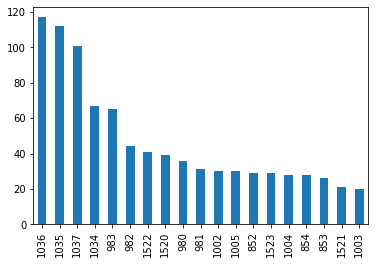

In [56]:
#Fazendo garfico de barra 
df["LojaID"].value_counts(ascending=False).plot.bar();

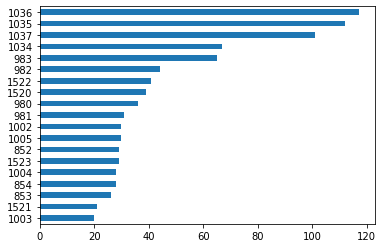

In [58]:
#Fazendo grafico de barra horizontal
df["LojaID"].value_counts(ascending=True).plot.barh();

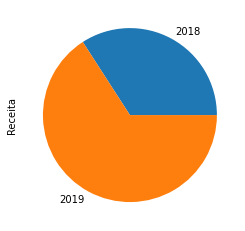

In [59]:
#Grafico pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [64]:
#total de vendas por cidades
df["Cidade"].value_counts()

Salvador     240
Natal        240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

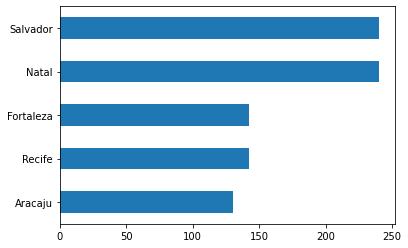

In [63]:
#totalde vendas em grafico
df["Cidade"].value_counts(ascending=True).plot.barh();

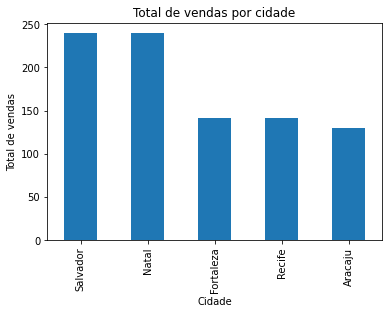

In [67]:
#Personalizando garficos adicionando titulos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas");


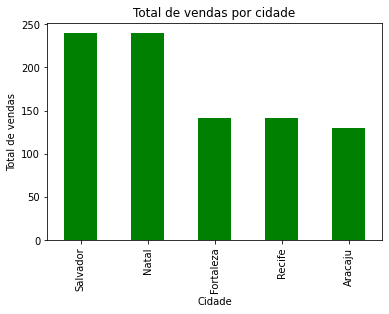

In [69]:
#mudando grafico 
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade", color="green")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas");

In [70]:
#alterando o estilo do grafico
plt.style.use("ggplot")

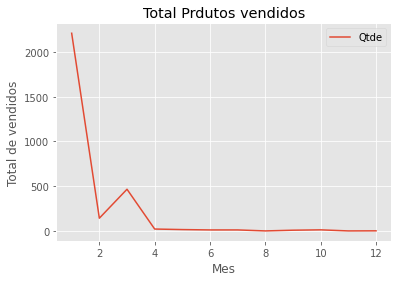

In [72]:
#Totalde vendas por mês
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total Prdutos vendidos")#colocando titulos
plt.xlabel("Mes")
plt.ylabel("Total de vendidos")
plt.legend();

In [73]:
#Qunatidades de produtos vendido por mês
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [80]:
#selecionando só 2019
df_2019 = df[df["Ano_Venda"] == 2019]

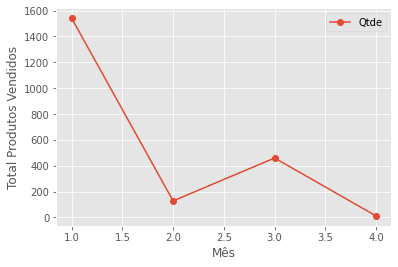

In [101]:
#total de produtos vendido no mês
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")# mudaddo marcador o ou v ou *
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

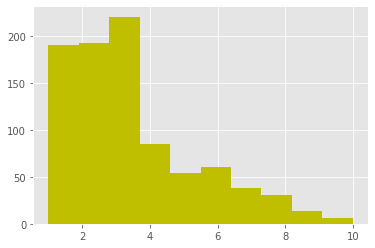

In [91]:
#grafico de histograma
plt.hist(df["Qtde"], color = "y");

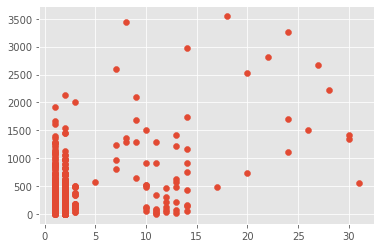

In [93]:
#fazendo uma grfico de dispersão
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);

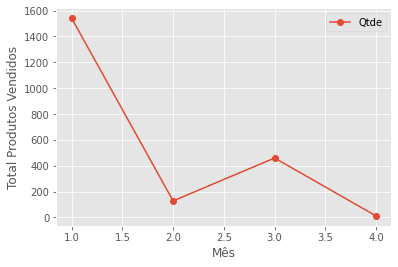

In [97]:
#Salvando graficos
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")# mudaddo marcador o ou v ou *
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend()
plt.savefig("grafico QTDE x MES>png");